In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
csv_file = tf.keras.utils.get_file(fname=None, origin=f'file:///C:/python/chronicare/dataset/jantung.csv', extract=True)
df = pd.read_csv(csv_file)
df = df.sample(frac = 1)
df.head()

,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,KidneyDisease,HeartDisease
7977,No,No,2,0,Male,80 or older,No,No,Good,8,Yes,Yes
1371,Yes,No,0,0,Male,70-74,No,No,Very good,7,No,No
6115,No,No,1,0,Female,40-44,No,Yes,Excellent,8,No,No
7160,No,No,1,1,Male,55-59,No,Yes,Good,7,No,No
9224,No,No,1,0,Female,80 or older,No,Yes,Good,7,No,No


In [13]:
df["AlcoholDrinking"] = pd.Categorical(df["AlcoholDrinking"])
df["AlcoholDrinking"] = df.AlcoholDrinking.cat.codes

df["PhysicalHealth"] = pd.Categorical(df["PhysicalHealth"])
df["PhysicalHealth"] = df.PhysicalHealth.cat.codes

df["MentalHealth"] = pd.Categorical(df["MentalHealth"])
df["MentalHealth"] = df.MentalHealth.cat.codes

df["Stroke"] = pd.Categorical(df["Stroke"])
df["Stroke"] = df.Stroke.cat.codes

df["Sex"] = pd.Categorical(df["Sex"])
df["Sex"] = df.Sex.cat.codes

df["AgeCategory"] = pd.Categorical(df["AgeCategory"])
df["AgeCategory"] = df.AgeCategory.cat.codes

df["Diabetic"] = pd.Categorical(df["Diabetic"])
df["Diabetic"] = df.Diabetic.cat.codes

df["PhysicalActivity"] = pd.Categorical(df["PhysicalActivity"])
df["PhysicalActivity"] = df.PhysicalActivity.cat.codes

df["GenHealth"] = pd.Categorical(df["GenHealth"])
df["GenHealth"] = df.GenHealth.cat.codes

df["KidneyDisease"] = pd.Categorical(df["KidneyDisease"])
df["KidneyDisease"] = df.KidneyDisease.cat.codes

df["HeartDisease"] = pd.Categorical(df["HeartDisease"])
df["HeartDisease"] = df.HeartDisease.cat.codes

target = df.pop("HeartDisease")

df

,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,KidneyDisease
7977,0,0,2,0,1,12,0,0,2,8,1
1371,1,0,0,0,1,10,0,0,4,7,0
6115,0,0,1,0,0,4,0,1,0,8,0
7160,0,0,1,1,1,7,0,1,2,7,0
9224,0,0,1,0,0,12,0,1,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...
9847,0,0,0,0,0,5,0,1,0,7,0
4407,0,0,0,0,1,0,0,1,4,7,0
9514,0,0,0,0,1,6,0,0,4,9,0
6637,0,0,0,1,0,5,0,1,0,8,0


In [14]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
train_dataset = dataset.shuffle(len(df)).batch(2)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset, epochs=100)

Epoch 1/100


326/326 [==============================] - 2s 4ms/step - loss: 0.2885 - accuracy: 0.9023
Epoch 2/100
326/326 [==============================] - 1s 4ms/step - loss: 0.2708 - accuracy: 0.9040
Epoch 3/100
326/326 [==============================] - 1s 4ms/step - loss: 0.2657 - accuracy: 0.9052
Epoch 4/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2621 - accuracy: 0.9050
Epoch 5/100
326/326 [==============================] - 1s 4ms/step - loss: 0.2602 - accuracy: 0.9064
Epoch 6/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9048
Epoch 7/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2550 - accuracy: 0.9047
Epoch 8/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.9043
Epoch 9/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2520 - accuracy: 0.9054
Epoch 10/100
326/326 [==============================] - 1s 3ms/step - loss: 0.2497 - accuracy: 0.9046
E

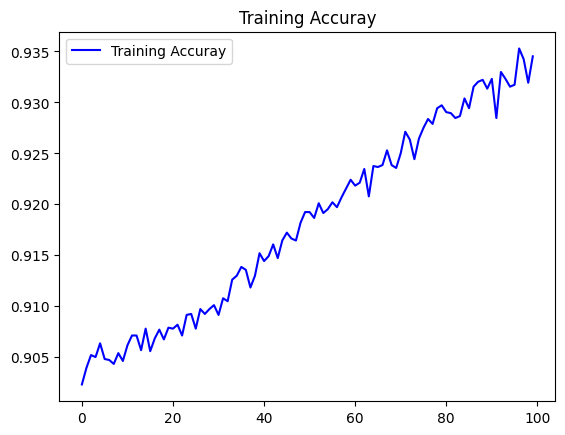

<Figure size 640x480 with 0 Axes>

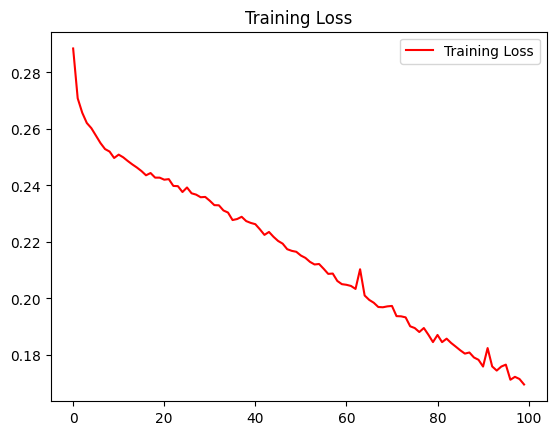

<Figure size 640x480 with 0 Axes>

In [17]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, 'b', label='Training Accuray')
plt.title('Training Accuray')
plt.legend(loc=0)
plt.figure()
plt.show()

print("")

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [19]:
history.history["accuracy"][-1]

0.9345255494117737